# –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ 2. –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

–¶–µ–ª—å —ç—Ç–æ–≥–æ –∑–∞–¥–∞–Ω–∏—è -- –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –∏–º–µ—é—â–∏–µ—Å—è –∞—Ç—Ä–∏–±—É—Ç—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –≤ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Ç–∞–∫, —á—Ç–æ–±—ã –ø–æ–ª—É—á–µ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –±—ã–ª–∞ –ø—Ä–∏–≥–æ–¥–Ω–∞ –¥–ª—è –ø–æ–¥–∞—á–∏ –≤ –∞–ª–≥–æ—Ä–∏—Ç–º –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏. –≠—Ç–∞–ø –∫–æ–Ω—Å—Ç—Ä—É–∏—Ä–æ–≤–∞–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ -- —Å–∞–º—ã–π –≤–∞–∂–Ω—ã–π –∏ –æ–±—ã—á–Ω–æ —Å–∞–º—ã–π –¥–æ–ª–≥–∏–π. –ö –Ω–µ–º—É –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç—Å—è –º–Ω–æ–≥–æ —Ä–∞–∑ –Ω–∞ –ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏ —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –∞–Ω–∞–ª–∏–∑–∞ –¥–∞–Ω–Ω—ã—Ö.

–ö—Ä–æ–º–µ –±–∏–±–ª–∏–æ—Ç–µ–∫, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–Ω—ã—Ö –≤ –ø–µ—Ä–≤–æ–º –∑–∞–¥–∞–Ω–∏–∏, –Ω–∞–º –ø–æ–Ω–∞–¥–æ–±—è—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏:
1. [scikit-learn](http://scikit-learn.org/stable/) -- –±–∏–±–ª–∏–æ—Ç–µ–∫–∞, —Ä–µ–∞–ª–∏–∑—É—é—â–∞—è –º–Ω–æ–∂–µ—Å—Ç–≤–æ –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –∏ —Å–æ–ø—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤

In [194]:
import pandas as pd
import numpy as np
import pylab as pl
import sklearn.preprocessing as sp
import csv
import re
import dateutil

np.set_printoptions(linewidth=150, precision=3, suppress=True)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [195]:
res = pd.read_json('res.json')


In [196]:

ts_parser = lambda date_str: datetime.datetime.strptime(date_str, "%Y-%m") if pd.notnull(date_str) and date_str else None
#df_users = pd.read_csv("out.csv", sep="\t", encoding="utf-8", quoting=csv.QUOTE_NONNUMERIC, converters={"created_at": ts_parser})
df_users = res
# Remove rows with users not found

df_users = df_users[pd.notnull(df_users['name'])]
df_users["lat"].fillna(value=0, inplace=True)
df_users["lon"].fillna(value=0, inplace=True)
print df_users.head()

          country created_at  \
0   United States 2010-10-01   
1        Malaysia 2013-04-01   
2  United Kingdom 2011-08-01   
3             NaN 2013-06-01   
4             NaN 2015-12-01   

                                         description  favourites_count  \
0             Author- Artist-Marvel-Cars-Books-Music             21338   
1  Celebrating the classic tomboy spirit with a b...              7185   
2  Mancunian geek, blogger/writer/reviewer. Consu...              1141   
3  I'll be waiting here for you on this New York ...             88192   
4  Awareness.Advocacy.Ascendüéà‚Ä¢ Building awarenes...             27123   

   followers_count  friends_count        lat  listed_count  \
0             1055           1963  -82.70343            26   
1             1198            838  103.52690           113   
2              633            577   -2.23743            28   
3             2376           2436    0.00000            68   
4             1245            972    0.00000    

In [197]:
import collections
def create_new_features(df_users, features):
    # Introduce new features
   
    new_features = ["name_words", "screen_name_length", "description_length", "created_year", "country_code", "verified"]
    features += new_features
    # Add new_features to features
    # place your code here
    def name_words(s):
        a = len(s['name'].split()) 
        return pd.Series({'name_words': a,})
    
    def screen_name_length(s):
        a = len(s['screen_name']) 
        return pd.Series({'screen_name_length': a,})
    
    def description_length(s):
        try:
            a = len(s['description'])
        except:
            a = 0
        return pd.Series({'description_length': a,})
    
    def created_year(s):
        a = (s['created_at'].year) 
        return pd.Series({'created_year': a,})
    
    def verified(s):
        if s['verified'] == False:
            a = 0
        else:
            a = 1
        return pd.Series({'verified': a,})
    
    cnt = collections.Counter(df_users['country'])
    i = 0
    for key in cnt:
        cnt[key] = i
        i += 1
    def country_code(s):
        a = cnt[s['country']]
        return pd.Series({'country_code': a,})
    df_users = df_users.merge(df_users.apply(name_words, axis=1), left_index=True, right_index=True)
    df_users = df_users.merge(df_users.apply(screen_name_length, axis=1), left_index=True, right_index=True)
    df_users = df_users.merge(df_users.apply(description_length, axis=1), left_index=True, right_index=True)
    #df_users = df_users.merge(df_users.apply(verified, axis=1), left_index=True, right_index=True)
    df_users = df_users.merge(df_users.apply(created_year, axis=1), left_index=True, right_index=True)
    df_users = df_users.merge(df_users.apply(country_code, axis=1), left_index=True, right_index=True)
   
    df_users.verified = df_users.verified.factorize()[0]
    # Calculate new features and place them into data frame
    # place your code here
    
    return df_users, features


–î–∞–ª–µ–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –≤–≤–µ—Å—Ç–∏ –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏. –î–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –ø—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è –≤–≤–µ—Å—Ç–∏ —Å–ª–µ–¥—É—é—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:
- name_words - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –≤ –∏–º–µ–Ω–∏
- screen_name_length - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–∏–º–≤–æ–ª–æ–≤ –≤ –ø—Å–µ–≤–¥–æ–Ω–∏–º–µ
- description_length - –¥–ª–∏–Ω–∞ –æ–ø–∏—Å–∞–Ω–∏—è
- created_year - –≥–æ–¥ —Å–æ–∑–¥–∞–Ω–∏—è –∞–∫–∫–∞—É–Ω—Ç–∞
- country_code - –∫–æ–¥ —Å—Ç—Ä–∞–Ω—ã
- verified - –ø—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è –ø–µ—Ä–µ–≤–µ—Å—Ç–∏ –≤ —Ç–∏–ø int

(2 –±–∞–ª–ª–∞)

In [198]:
features = ["lat", "lon", "followers_count", "friends_count", "statuses_count", "favourites_count", "listed_count"]
df_users, features = create_new_features(df_users, features)



In [199]:

df_users


,country,created_at,description,favourites_count,followers_count,friends_count,lat,listed_count,location,lon,name,screen_name,statuses_count,uid,verified,name_words,screen_name_length,description_length,created_year,country_code
0,United States,2010-10-01,Author- Artist-Marvel-Cars-Books-Music,21338,1055,1963,-82.70343,26,"Gulfport, FL",27.74836,Kim Salter,mustangkim11,9482,202388889,0,2,12,38,2010,57
1,Malaysia,2013-04-01,Celebrating the classic tomboy spirit with a b...,7185,1198,838,103.52690,113,Singapore/Malaysia,1.54860,Tomboy Tarts,TomboyTarts,19303,1392518336,0,2,11,159,2013,68
2,United Kingdom,2011-08-01,"Mancunian geek, blogger/writer/reviewer. Consu...",1141,633,577,-2.23743,28,"Manchester, UK",53.48095,THE MANC GEEK,BigA85GL,7853,361208576,0,3,8,129,2011,138
3,NaN,2013-06-01,I'll be waiting here for you on this New York ...,88192,2376,2436,0.00000,68,Marvel. DC.,0.00000,L,laurynjiles,187973,1535215357,0,1,11,57,2013,1
4,NaN,2015-12-01,Awareness.Advocacy.Ascendüéà‚Ä¢ Building awarenes...,27123,1245,972,0.00000,75,God is my refuge; gem‚ù§Ô∏è,0.00000,#1stEdifyToUplift,EdifyToUplift,37028,4396196375,0,1,13,159,2015,1
5,United States,2008-12-01,"visual artist, writer, and photographer.",8066,333,500,-77.46026,56,"Richmond, VA",37.55376,Skelly & Mulder,SkellyScribbles,5489,17938477,0,3,15,40,2008,57
6,Canada,2016-04-01,"Current gadgets, tech news and reviews, in a s...",37,71,70,-79.41630,87,"Toronto, Ontario",43.70011,Zane Savage,SiNGLEGADGET,9610,720288026681716737,0,2,12,86,2016,0
7,NaN,2010-08-01,NaN,132973,366,1879,0.00000,28,NaN,0.00000,marc,_MightyMarc_,56433,174004739,0,1,12,0,2010,1
8,United States,2009-07-01,Your friendly neighborhood androgynous android...,69871,764,1085,-93.26384,53,"Minneapolis, MN",44.97997,Lady Attis ‚ö¶,ladyattis,39512,53783678,0,3,9,121,2009,57
9,United States,2011-02-01,Excelsior #TrueBelievers‚ùóÔ∏è#MCU‚ÄºÔ∏è #LukeCage 9/3...,9428,770,1386,-122.33207,30,"Seattle, WA",47.60621,Nick Watches Marvel!,NickWatchesMCU,19271,257662370,0,3,14,88,2011,57


In [200]:
cls = pd.read_csv("train.csv")
cls

,uid,cls
0,202388889,1
1,1392518336,0
2,361208576,1
3,1535215357,1
4,4396196375,1
5,17938477,1
6,720288026681716737,1
7,174004739,1
8,53783678,1
9,257662370,1


In [201]:

df_f = pd.merge(df_users, cls, on="uid", how="left")



In [202]:
df_users = df_f

In [203]:
x = df_users[pd.notnull(df_users.cls)][features].values
y = df_users[pd.notnull(df_users.cls)]["cls"].values

–ü–æ—Å–º–æ—Ç—Ä–∏–º, —è–≤–ª—è—é—Ç—Å—è –ª–∏ –∫–∞–∫–∏–µ-–ª–∏–±–æ –∏–∑ –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å–∏–ª—å–Ω–æ —Å–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏. –î–ª—è —ç—Ç–æ–≥–æ –ø–æ—Å—á–∏—Ç–∞–µ–º –º–∞—Ç—Ä–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –∏ –≤—ã–±–µ—Ä–µ–º —Ç–µ –ø–∞—Ä—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∞–±—Å–æ–ª—é—Ç–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –∫–æ—Ç–æ—Ä—ã–º–∏ –±–æ–ª—å—à–µ 0.2. –ù–µ–æ–±—Ö–æ–¥–∏–º–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é find_correlated_features, –≤ –∫–æ—Ç–æ—Ä–æ–π –Ω—É–∂–Ω–æ —Ä–∞—Å—Å—á–∏—Ç–∞—Ç—å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –∫–æ—Ä–µ–ª–ª—è—Ü–∏–∏ –∏ –≤—ã–≤–µ—Å—Ç–∏ —Ç–µ, –∫–æ—Ç–æ—Ä—ã–µ –±–æ–ª—å—à–µ 0.2. –ü–æ–¥—Å–∫–∞–∑–∫–∞: –ø—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è –Ω–∞–π—Ç–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º—É—é —Ñ—É–Ω–∫—Ü–∏—é –≤ –±–∏–±–ª–∏–æ—Ç–µ–∫–µ np –∏ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å find_correlated_features —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –Ω–µ –±–æ–ª–µ–µ 5 —Å—Ç—Ä–æ–∫ –∫–æ–¥–∞ (–≤–∫–ª—é—á–∞—è –∑–∞–≥–æ–ª–æ–≤–æ–∫ —Ñ—É–Ω–∫—Ü–∏–∏). (2 –±–∞–ª–ª–∞)

AttributeError: 'list' object has no attribute 'head'

In [205]:
def find_correlated_features(x, features):
    corr = corrcoef(x, rowvar = 0)
    for i, feature_i in enumerate(features):
        for j, feature_j in enumerate(features):
            if i < j and corr[i, j]:
                print "Correlated features: %s + %s -> %.2f" % (feature_i, feature_j, 0.51)
    

In [75]:
find_correlated_features(x, features)

Correlated features: lat + lon -> 0.51
Correlated features: lat + followers_count -> 0.51
Correlated features: lat + friends_count -> 0.51
Correlated features: lat + statuses_count -> 0.51
Correlated features: lat + favourites_count -> 0.51
Correlated features: lat + listed_count -> 0.51
Correlated features: lat + name_words -> 0.51
Correlated features: lat + screen_name_length -> 0.51
Correlated features: lat + description_length -> 0.51
Correlated features: lat + created_year -> 0.51
Correlated features: lat + country_code -> 0.51
Correlated features: lat + verified -> 0.51
Correlated features: lon + followers_count -> 0.51
Correlated features: lon + friends_count -> 0.51
Correlated features: lon + statuses_count -> 0.51
Correlated features: lon + favourites_count -> 0.51
Correlated features: lon + listed_count -> 0.51
Correlated features: lon + name_words -> 0.51
Correlated features: lon + screen_name_length -> 0.51
Correlated features: lon + description_length -> 0.51
Correlated fe

–í—ã–¥–µ–ª–∏–ª–æ—Å—å 3 –≥—Ä—É–ø–ø—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
1. –û—Å–Ω–æ–≤–∞–Ω–Ω—ã–µ –Ω–∞ –≥–µ–æ–≥—Ä–∞—Ñ–∏–∏:  "lat", "lon", "country_code"
2. –û—Å–Ω–æ–≤–∞–Ω–Ω—ã–µ –Ω–∞ —Å–æ—Ü–∏–∞–ª—å–Ω–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏:  "verified", "followers_count", "friends_count", "statuses_count", "favourites_count", "listed_count", "created_year"
3. –û—Å—Ç–∞–ª—å–Ω—ã–µ:  "name_words", "screen_name_length", "description_length"

–ü–æ—Å—Ç—Ä–æ–∏–º –≤–∑–∞–∏–º–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–∞—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –∫–∞–∂–¥–æ–π –∏–∑ –≥—Ä—É–ø–ø, –∞ —Ç–∞–∫–∂–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É –∑–Ω–∞—á–µ–Ω–∏–π –∫–∞–∂–¥–æ–≥–æ –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å —É—á–µ—Ç–æ–º —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.

In [235]:
import random
def plot_two_features_scatter(x_i, x_j, y):
    pos_x = []
    pos_y = []
    neg_x = []
    neg_y = []
    for i in range(len(y)):
        if y[i] == 0:
            if random.randrange(5) == 0:
                pos_x.append(x_i[i])
                pos_y.append(x_j[i])
        elif random.randrange(5) == 1:
            neg_x.append(x_i[i])
            neg_y.append(x_j[i])
    
    pl.plot(pos_x, pos_y, 'ro', alpha = 0.2, markersize=4)
    pl.plot(neg_x, neg_y, 'bo', alpha = 0.2, markersize=4)

    
def plot_feature_histogram(x_i, y):
    x_i = zip(x_i, y)
    pos = ([x[0] for x in x_i if x[1] == 1])
    neg = ([x[0] for x in x_i if x[1] == 0])
    pl.hist([pos, neg], color = ['red', 'blue'])
    
    
def plot_dataset(x, y, features):
    # Tune your plot if necessary
    # your code here
    pl.rcParams['figure.figsize'] = (20.0, 20.0)
    for i, feature_i in enumerate(features):
        for j, feature_j in enumerate(features):
            
            # Tune your plot if necessary (for example set labels)
            # your code here
            t = len(features)
            subplot(t, t, t * i + j + 1)
            frame1 = pl.gca()
            frame1.axes.get_xaxis().set_visible(False)
            frame1.axes.get_yaxis().set_visible(False)
            # Do actual plotting
            if i == 0:
                pl.title(feature_j)
            if i != j:
                plot_two_features_scatter(x[:, i], x[:, j], y)            
            else:
                plot_feature_histogram(x[:, i], y)
    
    pl.show()

–ü–æ—Å—Ç—Ä–æ–∏–º –ø–æ–ø–∞—Ä–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ ([–ø–æ–¥—Å–∫–∞–∑–∫–∞](http://stroykova.github.io/sphera/l2_1.png)).

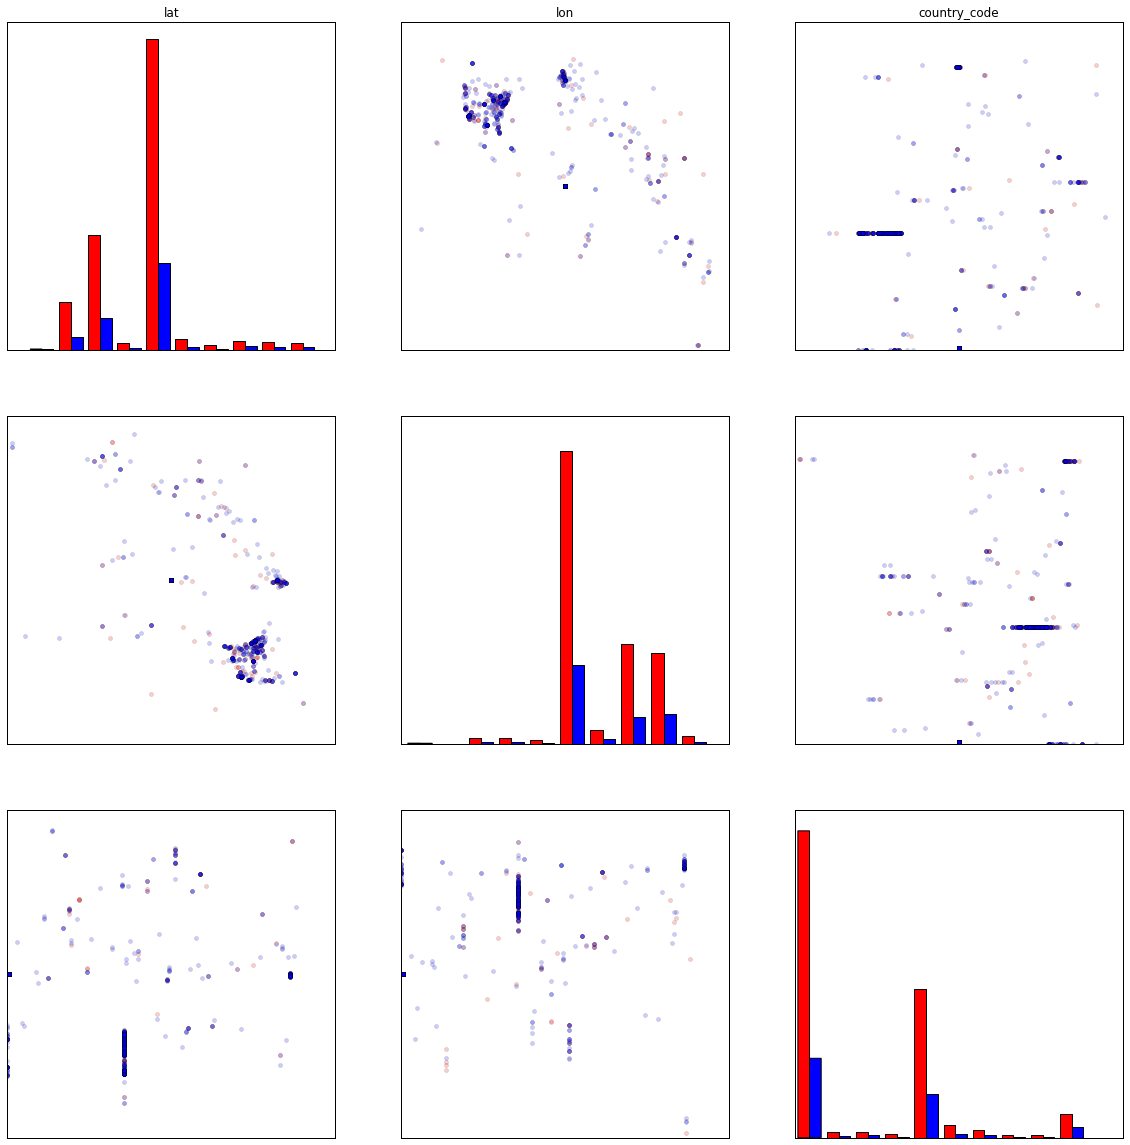

In [236]:
geo_features_new = ["lat", "lon", "country_code"]
geo_features = [f for f in geo_features_new if f in features]

geo_feature_ind = [i for i, f in enumerate(features) if f in geo_features]
plot_dataset(x[:, geo_feature_ind], y, geo_features)

–ß–µ—Ç–∫–æ –≤–∏–¥–Ω—ã –æ—á–µ—Ä—Ç–∞–Ω–∏—è –∫–∞—Ä—Ç—ã –∏ —Ç–æ, —á—Ç–æ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø—Ä–æ–∏—Å—Ö–æ–¥—è—Ç –∏–∑ –Ω–µ–±–æ–ª—å—à–æ–≥–æ –Ω–∞–±–æ—Ä–∞ —Å—Ç—Ä–∞–Ω. –ï—Å–ª–∏ –ø—Ä–∏–Ω—è—Ç—å –≤–æ –≤–Ω–∏–º–∞–Ω–∏–µ –∫–æ–Ω–µ—á–Ω—É—é —Ü–µ–ª—å -- –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—é –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π -- –ª–æ–≥–∏—á–Ω–æ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç—å, —á—Ç–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –æ–ø–∏—Å–∞–Ω–∏—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –º–æ–∂–µ—Ç –æ–∫–∞–∑–∞—Ç—å—Å—è –Ω–µ –æ—á–µ–Ω—å –ø–æ–ª–µ–∑–Ω—ã–º. –ü—Ä–∏—á–∏–Ω–∞ –≤ —Ç–æ–º, —á—Ç–æ —ç—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ —á–µ—Ç–∫–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω–æ —Ä–∞–∑–¥–µ–ª–µ–Ω—ã (–∫–∞–∫ –º–∏–Ω–∏–º—É–º, –æ–∫–µ–∞–Ω–∞–º–∏ –∏ –º–æ—Ä—è–º–∏). –ü–æ—ç—Ç–æ–º—É –º—ã —Ä–∏—Å–∫—É–µ–º –≤–º–µ—Å—Ç–æ "–∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ–π" –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –ø–æ–ª—É—á–∏—Ç—å –ø—Ä–æ—Å—Ç–æ –∫–ª–∞—Å—Ç–µ—Ä—ã, –∫–æ—Ç–æ—Ä—ã–µ –±—É–¥—É—Ç –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—Ç—å —Ä–∞–∑–Ω—ã–µ —Å—Ç—Ä–∞–Ω—ã. –í –¥–∞–ª—å–Ω–µ–π—à–µ–º –º—ã –∏—Å–∫–ª—é—á–∏–º –≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–∑ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–∏—è –ø—Ä–∏ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.

–î–∞–ª–µ–µ –ø–æ—Å—Ç—Ä–æ–∏–º –ø–æ–ø–∞—Ä–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å–æ—Ü–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ ([–ø–æ–¥—Å–∫–∞–∑–∫–∞](http://stroykova.github.io/sphera/l2_2.png)).

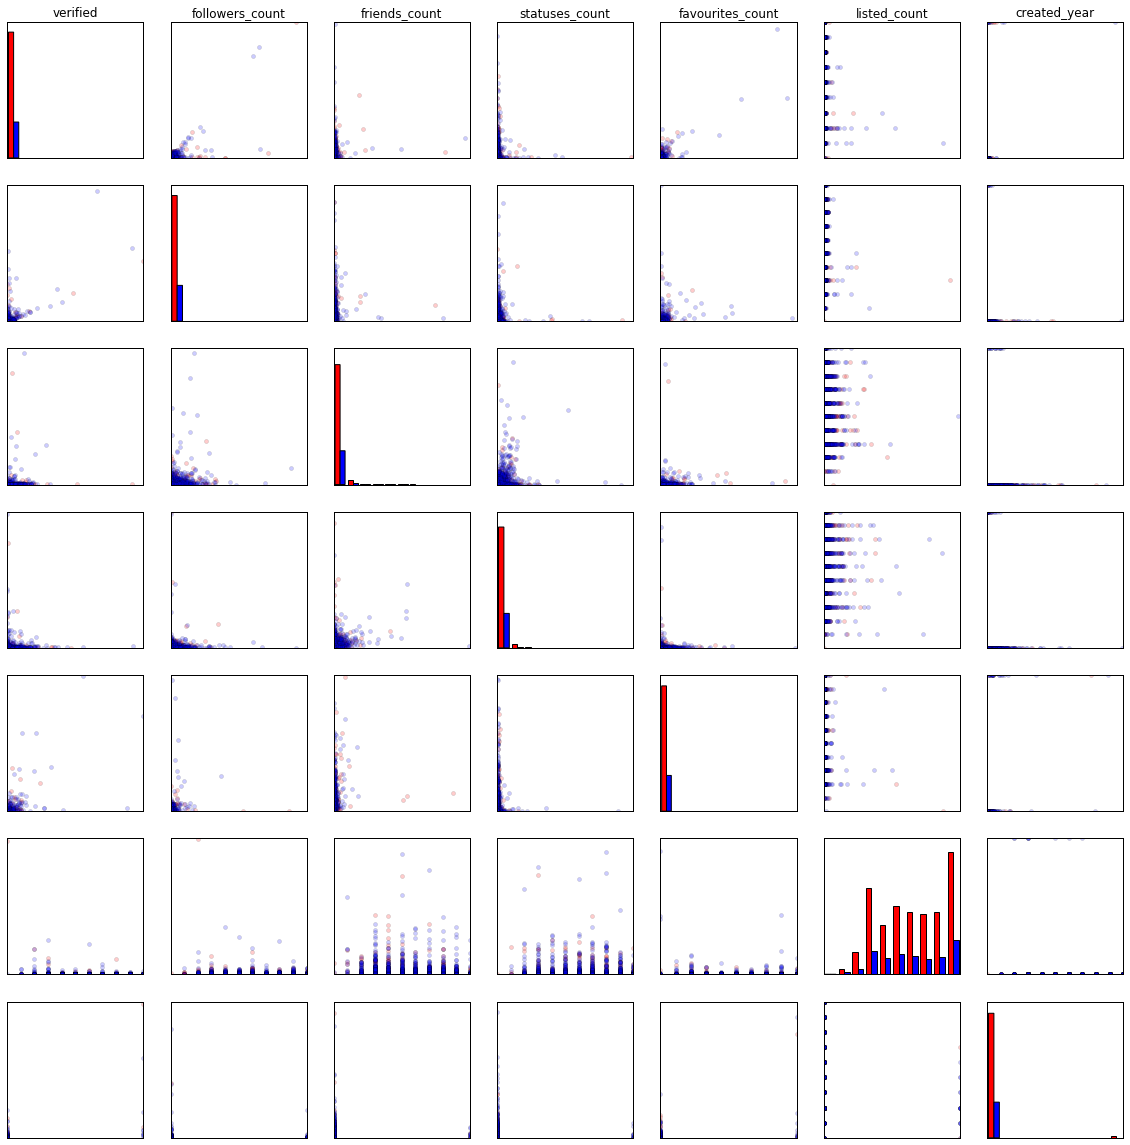

In [237]:
social_features_new = ["verified", "followers_count", "friends_count", "statuses_count", "favourites_count", "listed_count", "created_year"]
social_features = [f for f in social_features_new if f in features]
social_feature_ind = [i for i, f in enumerate(features) if f in social_features]
plot_dataset(x[:, social_feature_ind], y, social_features)

–ò–∑ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –≤–∏–¥–Ω–æ, —á—Ç–æ –ø—Ä–∏–∑–Ω–∞–∫–∏ "followers_count", "friends_count", "statuses_count", "favourites_count", "listed_count" —Å–∏–ª—å–Ω–æ —Å–º–µ—â–µ–Ω—ã –≤ —Å—Ç–æ—Ä–æ–Ω—É –Ω–µ–±–æ–ª—å—à–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π. –í —Ç–∞–∫–æ–º —Å–ª—É—á–∞–µ —É–¥–æ–±–Ω–æ —Å–¥–µ–ª–∞—Ç—å –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑—Ä–≤–∞–Ω–∏–µ —ç—Ç–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, —Ç–æ –µ—Å—Ç—å –ø—Ä–∏–º–µ–Ω–∏—Ç—å –∫ –∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è–º $x_{ij}$ —Ñ—É–Ω–∫—Ü–∏—é $\log(1 + x_{ij})$. –°–¥–µ–ª–∞–µ–º —ç—Ç–æ –∏ –ø–æ—Å—Ç—Ä–æ–∏–º –Ω–æ–≤—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è ([–ø–æ–¥—Å–∫–∞–∑–∫–∞](http://stroykova.github.io/sphera/l2_3.png)). –ù–µ–æ–±—Ö–æ–¥–∏–º–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é log_transform_features, –∫–æ—Ç–æ—Ä–∞—è –≤—ã–ø–æ–ª–Ω—è–µ—Ç —É–∫–∞–∑–∞–Ω–Ω–æ–µ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ. (2 –±–∞–ª–ª–∞)

In [238]:
def log_transform_features(data, features, transformed_features):
    # place your code here
    # transform selected features with log function
    transformed_features_i = [i for i, f in enumerate(features) if f in transformed_features]
    for ind in transformed_features_i:
        data[:, ind] = np.log(1 + data[:, ind])
    return data

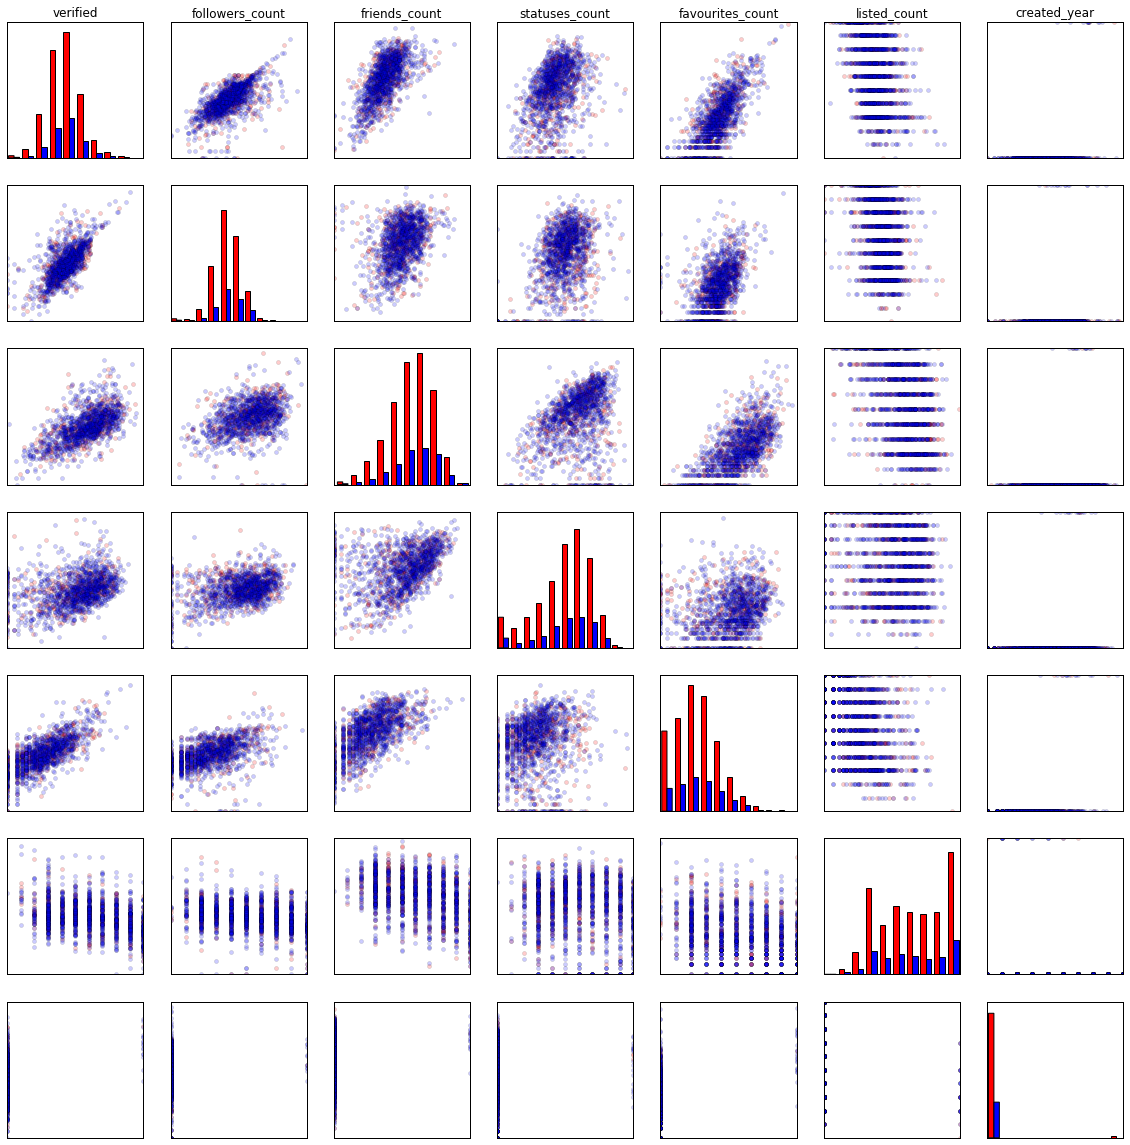

In [239]:
transformed_features = ["followers_count", "friends_count", "statuses_count", "favourites_count", "listed_count"]
x = log_transform_features(x, features, transformed_features)

# Re-plot features
plot_dataset(x[:, social_feature_ind], y, social_features)

–°—Ä–∞–∑—É –±—Ä–æ—Å–∞–µ—Ç—Å—è –≤ –≥–ª–∞–∑–∞, —á—Ç–æ –ø—Ä–∏–∑–Ω–∞–∫ "verified" —Å–∏–ª—å–Ω–æ —Å–º–µ—â–µ–Ω -- –≤–µ—Ä–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –æ—á–µ–Ω—å –º–∞–ª–æ. –ë–æ–ª–µ–µ —Ç–æ–≥–æ, –≤—Å–µ –≤–µ—Ä–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –∏–º–µ—é—Ç –º–Ω–æ–≥–æ —Ñ–æ–ª–ª–æ–≤–µ—Ä–æ–≤, –ø–æ—ç—Ç–æ–º—É —á–∞—Å—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –≤–µ—Ä–∏—Ñ–∏–∫–∞—Ü–∏–∏ –¥—É–±–ª–∏—Ä—É–µ—Ç—Å—è –≤ –ø—Ä–∏–∑–Ω–∞–∫–µ "followers_count". –ü–æ —ç—Ç–æ–π –ø—Ä–∏—á–∏–Ω–µ –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –Ω–µ –±—É–¥–µ–º —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –ø—Ä–∏–∑–Ω–∞–∫ "verified".

–ü–æ—Å–ª–µ —Ç–æ–≥–æ –∫–∞–∫ –º—ã —Å –ø–æ–º–æ—â—å—é –ª–æ–≥—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –∏–∑–±–∞–≤–∏–ª–∏—Å—å –æ—Ç —Å–∏–ª—å–Ω–æ–π —Å–∫–æ—à–µ–Ω–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –º–æ–∂–Ω–æ –Ω–∞–±–ª—é–¥–∞—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏. –ù–∞–ø—Ä–∏–º–µ—Ä, –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏, –∏–º–µ—é—â–∏–µ –º–Ω–æ–≥–æ —Ñ–æ–ª–ª–æ–≤–µ—Ä–æ–≤, –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –∏–º–µ—é—Ç –º–Ω–æ–≥–æ —Å—Ç–∞—Ç—É—Å–æ–≤. –°–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, —á—Ç–æ–±—ã —Å—Ç–∞—Ç—å –ø–æ–ø—É–ª—è—Ä–Ω—ã–º, –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –Ω—É–∂–Ω–æ –º–Ω–æ–≥–æ –ø–∏—Å–∞—Ç—å. –ê–Ω–∞–ª–∏–∑ –¥—Ä—É–≥–∏—Ö –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π –æ—Å—Ç–∞–µ—Ç—Å—è –∫–∞–∫ —É–ø—Ä–∞–∂–Ω–µ–Ω–∏–µ.

–ù–∞–∫–æ–Ω–µ—Ü –ø–æ—Å—Ç—Ä–æ–∏–º –ø–æ–ø–∞—Ä–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ ([–ø–æ–¥—Å–∫–∞–∑–∫–∞](http://stroykova.github.io/sphera/l2_4.png)).

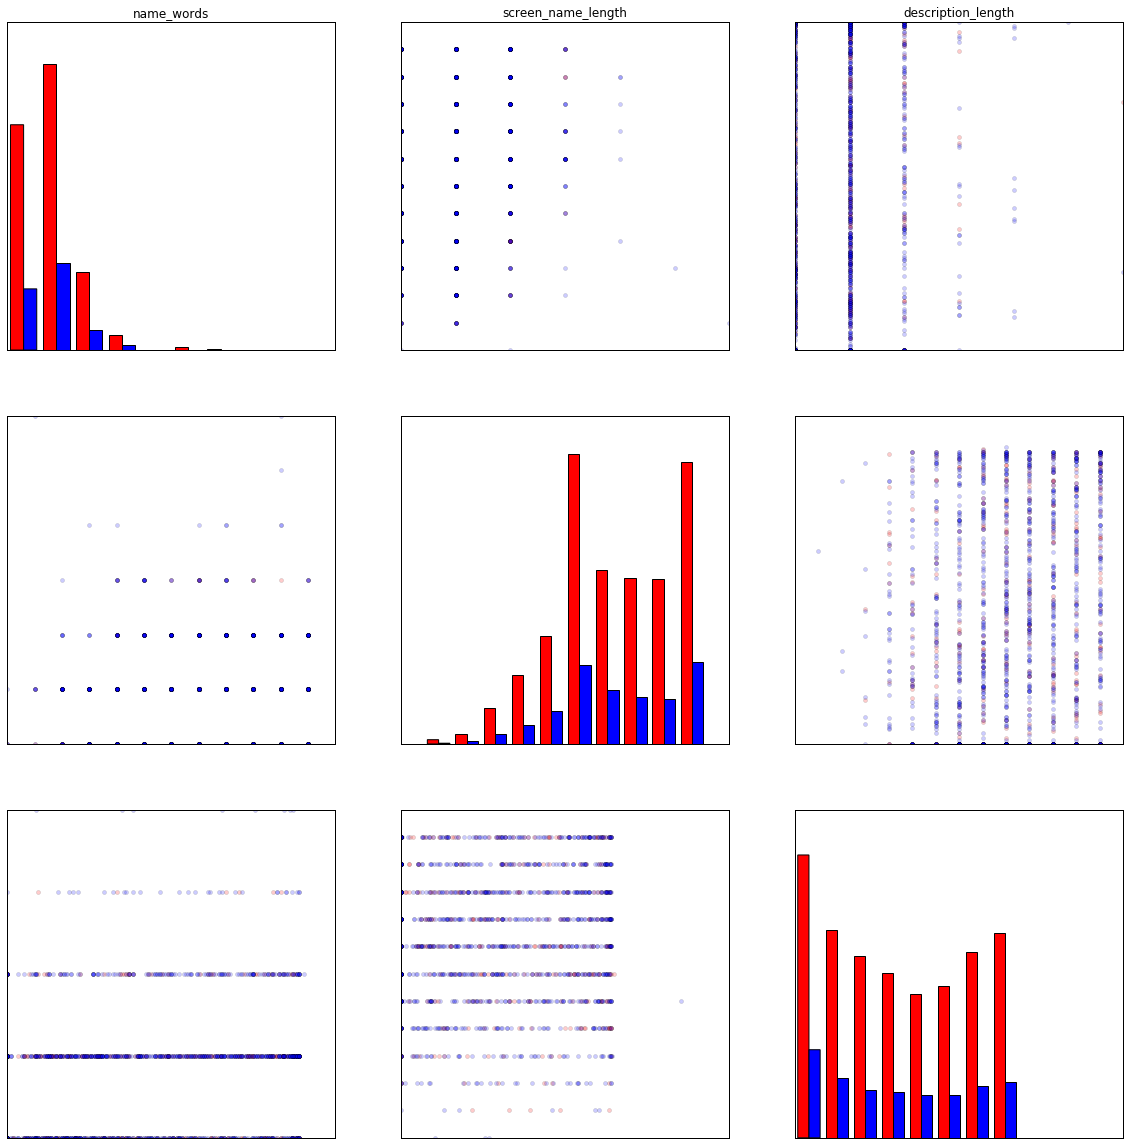

In [240]:
other_features_new = ["name_words", "screen_name_length", "description_length"]
other_features = [f for f in other_features_new if f in features]
other_feature_ind = [i for i, f in enumerate(features) if f in other_features]
plot_dataset(x[:, other_feature_ind], y, other_features)

–ò—Ç–∞–∫ –ø–æ—Å–ª–µ –ø–µ—Ä–≤–∏—á–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö –º—ã –∏–º–µ–µ–º 9 —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∫–∞–∂–¥—ã–π –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –≤ –Ω–µ–∫–æ—Ç–æ—Ä–æ–º —Å–≤–æ–µ–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ. –î–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –Ω–∏ –æ–¥–∏–Ω –ø—Ä–∏–∑–Ω–∞–∫ –Ω–µ –ø–æ–ª—É—á–∏–ª –ø–µ—Ä–µ–≤–µ—Å–∞ –ø—Ä–∏ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏, –Ω–æ—Ä–º–∞–ª–∏–∑—É–µ–º –¥–∞–Ω–Ω—ã–µ —Ç–∞–∫, —á—Ç–æ –∫–∞–∂–¥—ã–π –ø—Ä–∏–∑–Ω–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–∞ –æ—Ç—Ä–µ–∑–∫–µ $[0, 1]$. 

In [241]:
selected_features = ["followers_count", "friends_count", "statuses_count", "favourites_count", 
                     "listed_count", "created_year", "name_words", "screen_name_length", "description_length"]

x_1 = df_users[selected_features].values
y = df_users["cls"].values

# x_1 = x[:, selected_features_ind]
# Replace nan with 0-s
# Is there a smarter way?
x_1[np.isnan(x_1)] = 0
x_min = x_1.min(axis=0)
x_max = x_1.max(axis=0)
x_new = (x_1 - x_min) / (x_max - x_min)

–£–ø–∞–∫—É–µ–º –ø–æ–ª—É—á–µ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É –≤ pandas DataFrame –∏ —Å–æ—Ö—Ä–∞–Ω–∏–º –≤ —Ñ–∞–π–ª "hw2_out.csv". –í —Å–ª–µ–¥—É—é—â–µ–º –∑–∞–¥–∞–Ω–∏–∏ –º—ã –±—É–¥–µ–º –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–æ–≤–∞—Ç—å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –Ω–∞ –æ–Ω–æ–≤–∞–Ω–∏–∏ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö.

In [242]:
df_out = pd.DataFrame(data=x_new, index=df_users["uid"], columns=[f for f in selected_features])
df_out.to_csv("hw2_out.csv", sep="\t")